In [1]:
import tensorflow as tf

In [2]:
NUM_WORDS = 10000

In [3]:
(X_train, Y_train), (X_val, Y_val) = tf.keras.datasets.reuters.load_data(num_words=NUM_WORDS)

In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [5]:
word_index = tf.keras.datasets.reuters.get_word_index()
inverse_index = dict((value, key) for (key, value) in word_index.items())

In [6]:
" ".join(inverse_index.get(i-3, "?") for i in X_train[0])

'? ? ? said as a ? of its ? ? of ? ? it ? ? per share in 1987 of 1 ? to 1 ? dlrs per share up from ? cts in 1986 the company said ? net ? ? to ? to 10 mln dlrs from ? mln dlrs in 1986 and ? ? ? to ? to ? mln dlrs from ? 5 mln dlrs it said ? ? per share this year ? be 2 ? to ? dlrs reuter 3'

In [7]:
import numpy as np

In [8]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [9]:
def to_one_hot(sentence, max_lenght=NUM_WORDS):
    results = np.zeros((len(sentence), max_lenght))
    for i, word_index in enumerate(sentence):
        results[i][word_index] = 1

    return results

In [10]:
X_train_one_hot = to_one_hot(X_train, NUM_WORDS)
X_val_one_hot = to_one_hot(X_val, NUM_WORDS)

In [11]:
Y_train_one_hot = tf.keras.utils.to_categorical(Y_train)
Y_val_one_hot = tf.keras.utils.to_categorical(Y_val)

In [12]:
X_input = tf.keras.layers.Input(shape=(NUM_WORDS,))

X = tf.keras.layers.Dense(activation='relu', units=64)(X_input)

X_output = tf.keras.layers.Dense(activation='softmax', units=46)(X_input)

model = tf.keras.Model(inputs=[X_input], outputs=[X_output])

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2023-03-30 17:30:54.310947: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-30 17:30:54.311067: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='rmsprop', metrics=['accuracy'])

In [14]:
X_train_one_hot.shape

(8982, 100)

In [15]:
X_val_one_hot.shape

(2246, 100)

In [16]:
EPOCHS = 30

In [17]:
history = model.fit(X_train_one_hot, Y_train_one_hot, validation_data=(X_val_one_hot, Y_val_one_hot), epochs=EPOCHS)

Epoch 1/30


2023-03-30 17:30:54.568965: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-30 17:30:54.679635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


280/281 [============================>.] - ETA: 0s - loss: 2.3862 - accuracy: 0.4468

2023-03-30 17:30:57.168839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


281/281 [==============================] - 3s 10ms/step - loss: 2.3860 - accuracy: 0.4466 - val_loss: 1.9397 - val_accuracy: 0.5410
Epoch 2/30
281/281 [==============================] - 3s 10ms/step - loss: 1.7440 - accuracy: 0.5723 - val_loss: 1.7014 - val_accuracy: 0.5882
Epoch 3/30
281/281 [==============================] - 3s 10ms/step - loss: 1.5472 - accuracy: 0.6190 - val_loss: 1.5905 - val_accuracy: 0.6229
Epoch 4/30
281/281 [==============================] - 3s 10ms/step - loss: 1.4358 - accuracy: 0.6483 - val_loss: 1.5339 - val_accuracy: 0.6420
Epoch 5/30
281/281 [==============================] - 3s 10ms/step - loss: 1.3617 - accuracy: 0.6676 - val_loss: 1.4935 - val_accuracy: 0.6483
Epoch 6/30
281/281 [==============================] - 3s 11ms/step - loss: 1.3127 - accuracy: 0.6796 - val_loss: 1.4635 - val_accuracy: 0.6634
Epoch 7/30
281/281 [==============================] - 3s 11ms/step - loss: 1.2730 - accuracy: 0.6907 - val_loss: 1.4465 - val_accuracy: 0.6719
Epoch 8/30

In [18]:
import matplotlib.pyplot as plt

In [19]:
def print_loss_curves(history, EPOCHS):
    epochs = range(1, EPOCHS+1)

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.plot(epochs, train_loss, "bo", label="train")
    plt.plot(epochs, val_loss, "b", label="val")

    plt.xlabel="epochs"

    plt.ylabel="loss"

    plt.legend()

    plt.show()

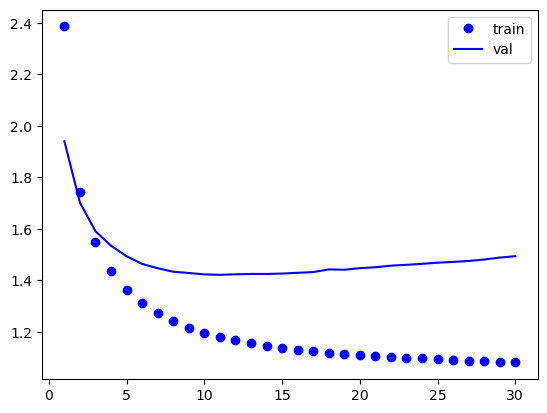

In [20]:
print_loss_curves(history=history, EPOCHS=EPOCHS)

# Baseline

For the baseline I will take a random guess and calculate the accuracy.

This method consist of choosing a for each sample a random value. This is achieve comparing the validation tags values to the same but shuffle at random.

In [21]:
# First I need to copy the validation ground thrut values
Y_val_copy = Y_val.copy()
#Shuffle the labels
np.random.shuffle(Y_val_copy)
#Calculate the accuray
accuracy = (Y_val_copy == Y_val).mean()

In [22]:
print("The accuracy of the baseline is: ", accuracy)

The accuracy of the baseline is:  0.19011576135351738


# Conclution

So far the baseline achieves a 19% accuracy meanwhile the model achieves 79.8%

## Points so far:
- A simple neural network is able to beat the baseline.
- We need to be carefull when evaluation a model over train could lead to overfitting
- Also we need to avoid informations bottleneck, in this case the output is a 46 dimensions array thus using less than 46 in an intermediate layer could lead to loss of information that could not be recover later on.

# Experiments

## We could try to reduce or increase the
- NUM_WORDS
- Increase units in each layer
- Add more layers
